<h1>TAREA 8</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<p>Implementarunodelossiguientesalgortimos:</p>
<li>Algoritmo de umbralización multinevel de Otsu (Ref. 1).</li>
<li>Algoritmo para la umbralización multinivel basado en estadística recursiva (Ref. 2).</li>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

In [13]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division

img = cv2.imread('Fig/libro.jpg',0)
print "Listo"


Listo


val1 [[   0.        ]
 [-114.75634766]
 [ -51.60516357]
 [ -77.14453125]
 [-111.76464844]
 [-149.890625  ]
 [-179.04174805]
 [-169.23681641]
 [-199.6796875 ]
 [-207.46813965]
 [-195.96337891]
 [-182.24377441]
 [-151.23461914]
 [-135.34118652]
 [-124.35070801]
 [-101.23510742]
 [-103.19848633]
 [ -86.33001709]
 [ -86.22485352]
 [ -82.09960938]
 [ -67.44482422]
 [ -60.63165283]
 [ -50.98577881]
 [ -51.81530762]
 [ -50.98577881]
 [ -44.27786255]
 [ -39.42797852]
 [ -33.54925537]
 [ -29.318573  ]
 [ -27.97497559]
 [ -26.73626709]
 [ -21.37147522]
 [ -21.99087524]
 [ -23.02012634]
 [ -23.22962952]
 [ -19.40869141]
 [ -20.64741516]
 [ -20.54273987]
 [ -17.19697571]
 [ -18.84562683]
 [ -16.4732666 ]
 [ -18.33094788]
 [ -15.85404968]
 [ -13.48164368]
 [ -16.36882019]
 [ -20.64741516]
 [ -15.95848083]
 [ -15.13050842]
 [ -14.5113678 ]
 [ -13.48164368]
 [ -15.74963379]
 [ -14.10084534]
 [ -16.57772827]
 [ -14.72003174]
 [ -15.3392334 ]
 [ -18.43551636]
 [ -29.2137146 ]
 [ -26.22171021]
 [ -32.92

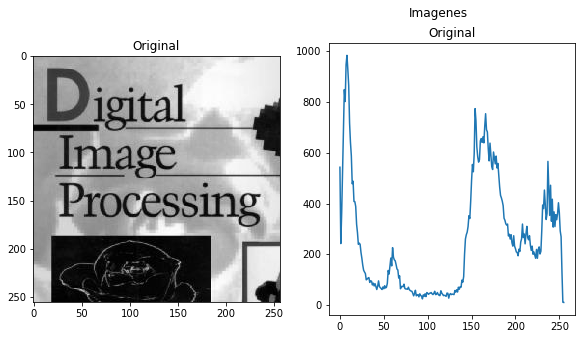

In [37]:
def otsu(img):
    # find normalized_histogram, and its cumulative distribution function
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist_norm = hist.ravel()/hist.max()
    Q = hist_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
    for i in xrange(1,256):
        p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
        q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
        b1,b2 = np.hsplit(bins,[i]) # weights
        # finding means and variances
        m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
        v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
        # calculates the minimization function
        fn = v1*q1 + v2*q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
    # find otsu's threshold value with OpenCV function
    return thresh,hist

def mcom(k1,k2):
    val = 1/(k2-k1+1)
    k1 = np.rint(k1)
    k2 = np.rint(k2)
    hist1 = cv2.calcHist([img],[0],None,[256],[0,255])
    hist2 = cv2.calcHist([img],[0],None,[256],[0,255])
    sumat = hist1*k1+hist2*k2
    return val*sumat

def otsu_ml(img):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    kmax = np.amax(hist)-np.amin(hist)
    k1 = kmax/3
    k2 = 2*kmax/3
    e1 = np.array([100])
    e2 = np.array([100])
    cont = 0
    while (e1.all() > 0.5 and e2.all() >0.5) and  cont <6:
        e1 = (mcom(0,k1)+mcom(k1,k2))/2 -k1
        e2 = (mcom(k1,k2)+mcom(k2,255))/2 -k2
        
        k1 = k1 +e1
        k2 = k2 +e2
        cont +=1
        
    return k1,k2
r1,r2 = otsu_ml(img)

plt.figure(2,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.plot(hist), plt.title('Original')
print "val1",r1,r2